In [1]:
#%% Imports
# Reload libraries that might have been edited
import importlib as il

import LSTMModels
il.reload(LSTMModels)
from LSTMModels import LSTMModels

import ConvModels
il.reload(ConvModels)
from ConvModels import ConvModels

import utils
il.reload(utils)
from utils import dataHelpers as dh
from utils import multiChannelMod as AVMod

from keras import backend as K

import matplotlib.pyplot as plt

Using TensorFlow backend.


# Parameters

## Shared

In [2]:
nEp = 2000

## Specific

# Data

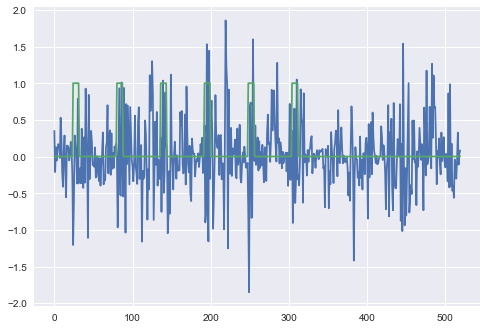

Aud
[6]
[ 1.  0.]


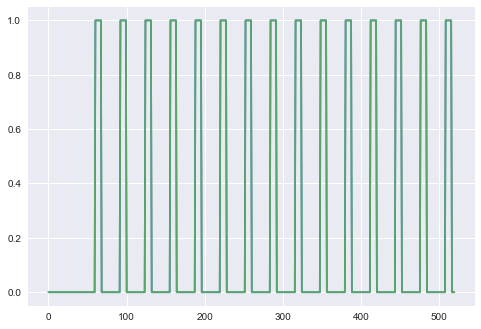

Vis
[16]
[ 0.  1.]
Mean event distribution in aud train set:


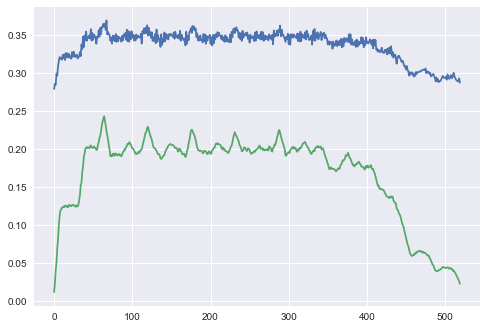

Mean event distribution in aud test set:


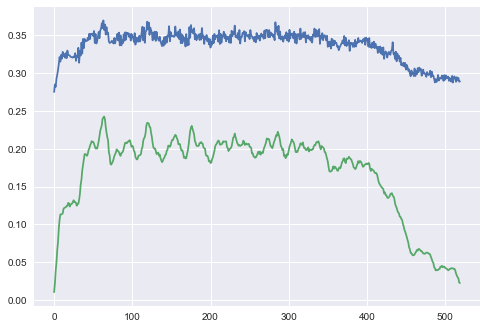

Mean event distribution in vis train set:


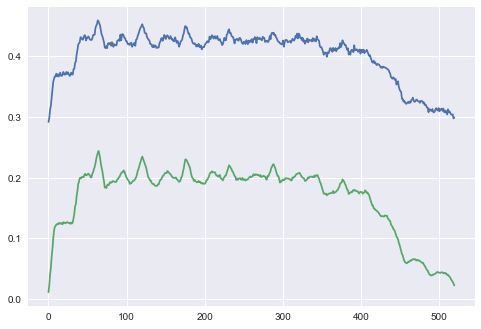

Mean event distribution in vis test set:


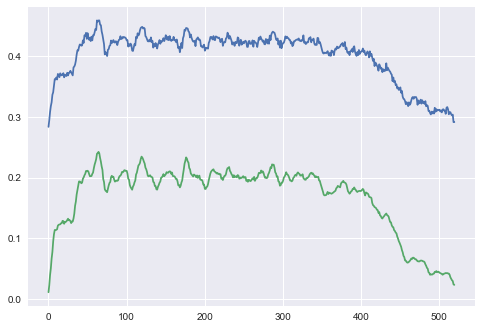

In [3]:
#%% Load AV dataset

dPath = 'Data/'
dSet = 'stimData_AV_s14_20000x400.mat'

# Load the dataset
data = dh(dPath+dSet, name='s12')
data = data.loadMatAV()

data = data.split(n=12000)

data.plotDists()

# Conv models

## Early

In [4]:
K.clear_session()

modAVConv1 = AVMod(mod=ConvModels(name='AVConv').multiChanLate,  
                  dataLength = data.xTrainExpAud.shape[1], 
                  nFil=256, ks=128, strides=32)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
c1_input (InputLayer)            (None, 520, 1)        0                                            
____________________________________________________________________________________________________
c2_input (InputLayer)            (None, 520, 1)        0                                            
____________________________________________________________________________________________________
c1_Conv_l1 (Conv1D)              (None, 13, 256)       33024       c1_input[0][0]                   
____________________________________________________________________________________________________
c2_conv_l1 (Conv1D)              (None, 13, 256)       33024       c2_input[0][0]                   
___________________________________________________________________________________________

In [5]:
modAVConv1.history = modAVConv1.fit([data.xTrainExpAud, data.xTrainExpVis],
            [data.yTrainRAud, data.yTrainRAud, 
             data.yTrainRAud, data.yTrainDAud],
            batch_size=500, epochs=nEp, validation_split=0.2, verbose=0)

Training history


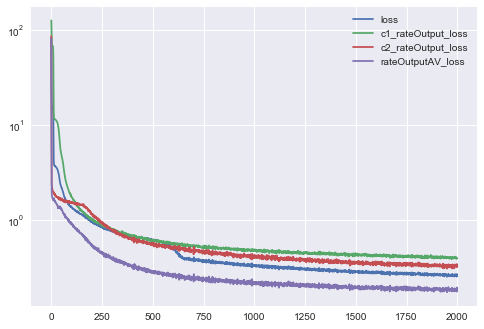

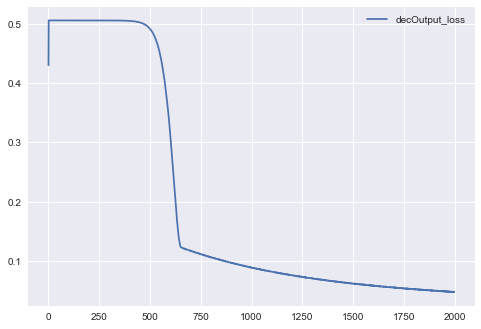

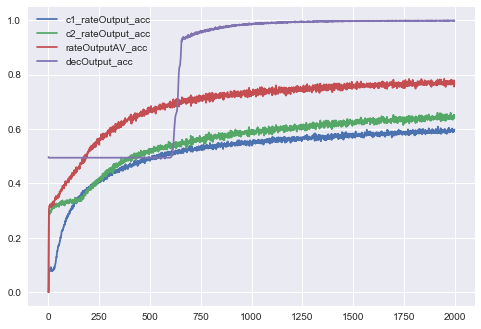

Validation history


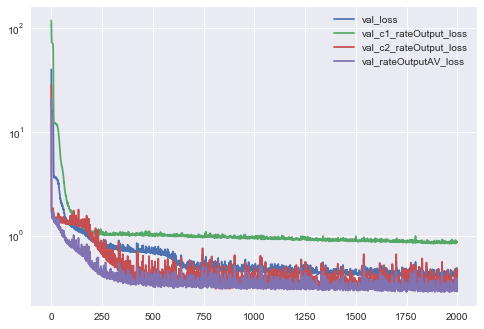

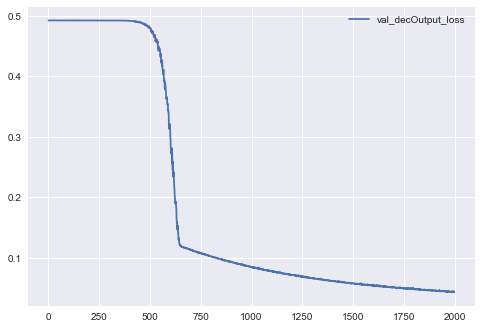

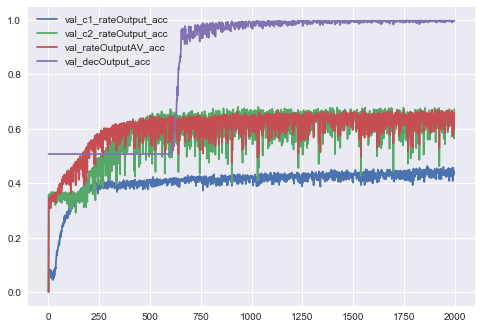

In [6]:
modAVConv1.plotHistory()

Random example:
Stim, events:


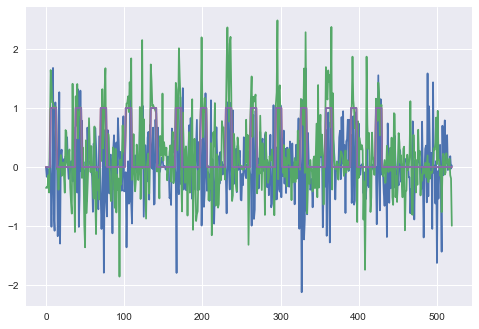

Pred rate A | V: [ 13.56157112] | [ 14.40230274]
GT rate A | V: [14] | [14]
Pred dec AV: [ 0.10606352  0.89393651]
Overall rate loss A | V | AV: 0.29 | 0.22 | 0.17
Overall rate acc A | V | AV: 0.85 | 0.9 | 0.93
Overall dec acc A | V | AV: nan | nan | 1.0
Random example:
Stim, events:


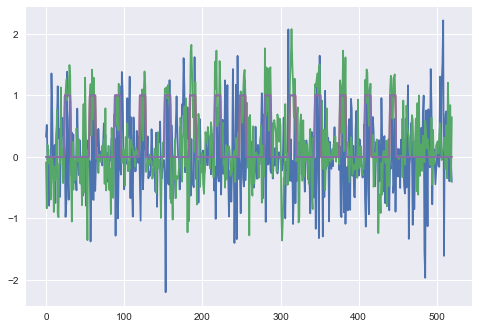

Pred rate A | V: [ 13.79715538] | [ 14.13404655]
GT rate A | V: [14] | [14]
Pred dec AV: [ 0.11504316  0.8849569 ]
Overall rate loss A | V | AV: 0.29 | 0.22 | 0.17
Overall rate acc A | V | AV: 0.85 | 0.9 | 0.93
Overall dec acc A | V | AV: nan | nan | 1.0


In [7]:
# Evaluate
modAVConv1 = modAVConv1.evaluate(data, setName='train')
modAVConv1 = modAVConv1.evaluate(data, setName='test')

## Late

In [8]:
#%% Train early integration (Conv, AV data)

# K.clear_session()

modAVConv2 = AVMod(mod=ConvModels(name='AVConv').multiChanEarly,  
                  dataLength = data.xTrainExpAud.shape[1], 
                  nFil=256, ks=128, strides=32)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
c1_input (InputLayer)            (None, 520, 1)        0                                            
____________________________________________________________________________________________________
c2_input (InputLayer)            (None, 520, 1)        0                                            
____________________________________________________________________________________________________
c1_Conv_l1 (Conv1D)              (None, 13, 256)       33024       c1_input[0][0]                   
____________________________________________________________________________________________________
c2_conv_l1 (Conv1D)              (None, 13, 256)       33024       c2_input[0][0]                   
___________________________________________________________________________________________

In [9]:
modAVConv2.history = modAVConv2.fit([data.xTrainExpAud, data.xTrainExpVis],
            [data.yTrainRAud, data.yTrainRAud, 
             data.yTrainRAud, data.yTrainDAud],
            batch_size=500, epochs=nEp, validation_split=0.2, verbose=0)

Training history


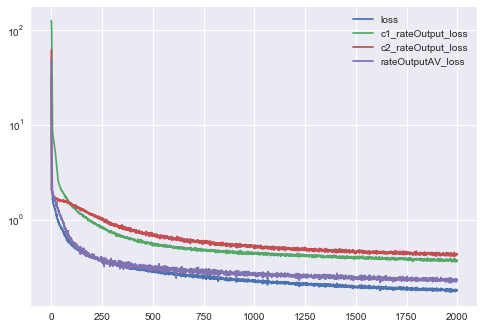

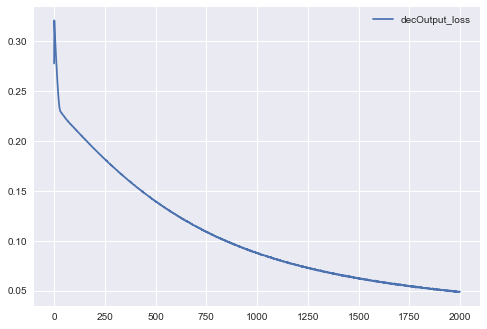

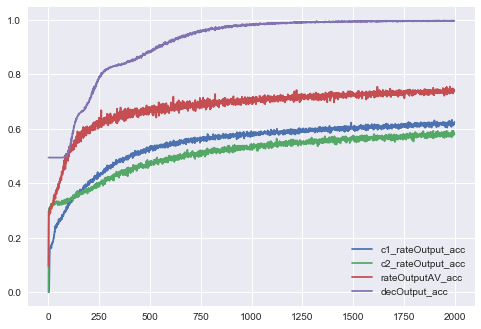

Validation history


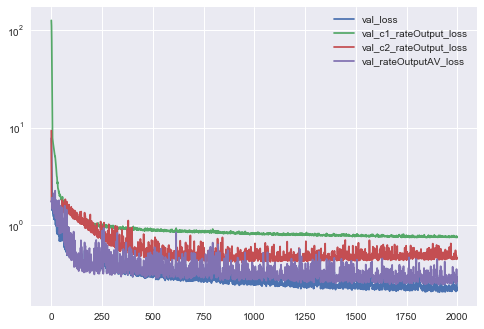

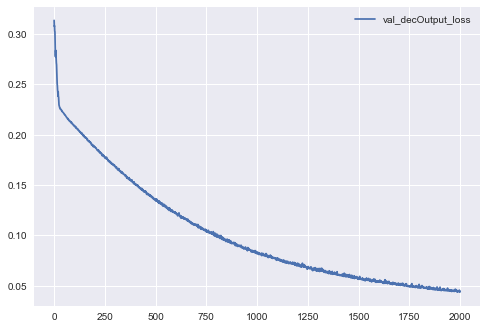

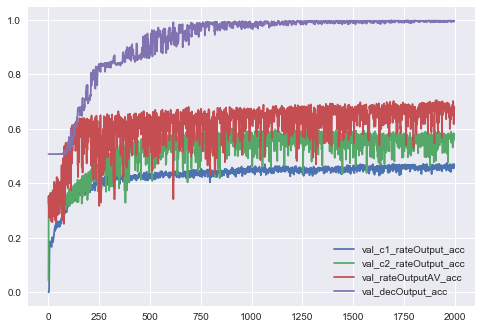

In [10]:
modAVConv2.plotHistory()

Random example:
Stim, events:


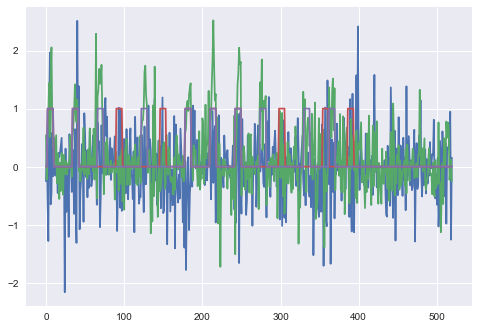

Pred rate A | V: [ 10.07982922] | [ 10.32519722]
GT rate A | V: [10] | [10]
Pred dec AV: [ 0.59887409  0.40112594]
Overall rate loss A | V | AV: 0.24 | 0.28 | 0.19
Overall rate acc A | V | AV: 0.88 | 0.86 | 0.91
Overall dec acc A | V | AV: nan | nan | 1.0
Random example:
Stim, events:


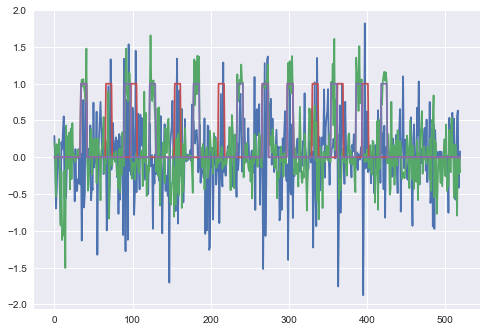

Pred rate A | V: [ 10.25907421] | [ 9.95690727]
GT rate A | V: [10] | [10]
Pred dec AV: [ 0.60964853  0.39035144]
Overall rate loss A | V | AV: 0.24 | 0.28 | 0.19
Overall rate acc A | V | AV: 0.88 | 0.86 | 0.91
Overall dec acc A | V | AV: nan | nan | 1.0


In [11]:
# Evaluate
modAVConv2 = modAVConv2.evaluate(data, setName='train')
modAVConv2 = modAVConv2.evaluate(data, setName='test')

# LSTM models

## Early

## Late

# Mixed models

# Comparisons

Random example:
Stim, events:


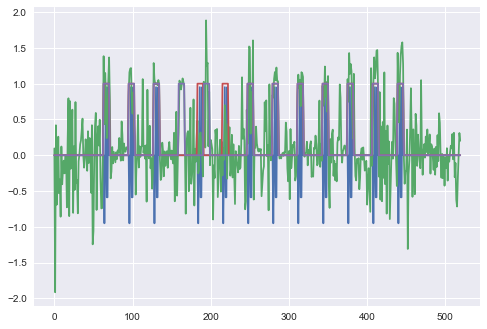

Pred rate A | V: [ 12.06806946] | [ 11.93454742]
GT rate A | V: [12] | [12]
Pred dec AV: [ 0.31442508  0.68557489]
Overall rate loss A | V | AV: 0.29 | 0.22 | 0.17
Overall rate acc A | V | AV: 0.85 | 0.9 | 0.93
Overall dec acc A | V | AV: nan | nan | 1.0


In [12]:
modAVConv1 = modAVConv1.evaluate(data, setName='test')
                                

Random example:
Stim, events:


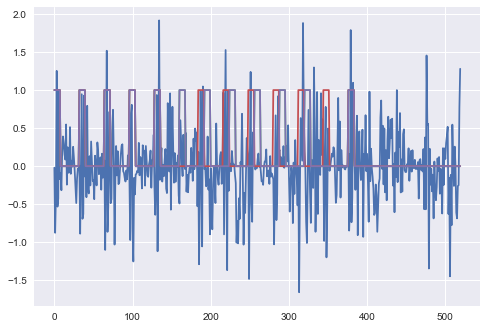

Pred rate A | V: [ 11.88415241] | [ 12.08992863]
GT rate A | V: [12] | [12]
Pred dec AV: [ 0.31193978  0.68806022]
Overall rate loss A | V | AV: 0.24 | 0.28 | 0.19
Overall rate acc A | V | AV: 0.88 | 0.86 | 0.91
Overall dec acc A | V | AV: nan | nan | 1.0


In [13]:
modAVConv2 = modAVConv2.evaluate(data, setName='test')